# Workshop 1️: EDA & Study Design

**🎯 Goals of this Workshop**
1. Define Inclusion Criteria to build a working cohort
2. Explore the Ground-Truths, present in the data set


**✏️ Expected Deliverables**
- Flow chart with inclusion and exclusion criteria, reporting who's being left out, by demographics



**❗ Highlighted Pitfall(s)**
* Sampling and Representation Bias

## 1. Study Cohort Creation

**What is a Flowchart in this context?**

A Flowchart reflects the study cohort creation, by selecting the patients that best suit our study design.

It is a helpful tool to visualize the numbers after applying our inclusion and exclusion criteria.

**Example (part of one):**

<div>
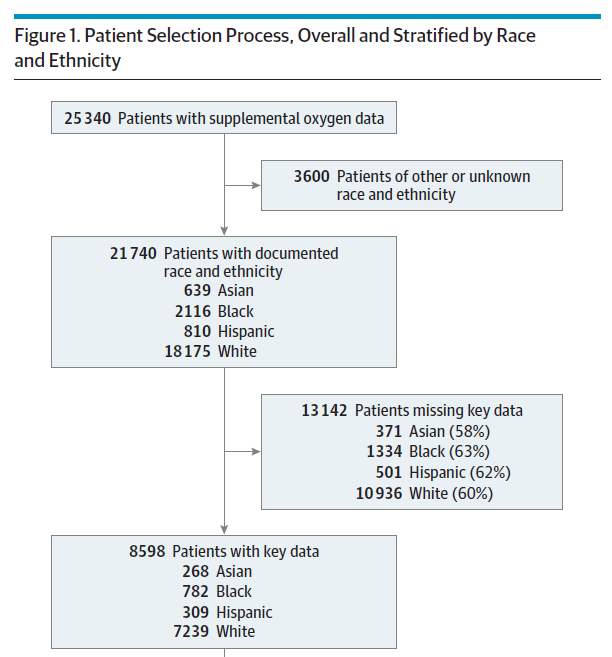
</div>

**Source:**
Gottlieb ER, Ziegler J, Morley K, Rush B, Celi LA. Assessment of Racial and Ethnic Differences in Oxygen Supplementation Among Patients in the Intensive Care Unit. JAMA Intern Med. 2022;182(8):849–858. https://doi:10.1001/jamainternmed.2022.2587

### ✏️ Initial Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np

# # For those who use Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/"Colab Notebooks"/"your_path_to_drive_root_dir"

`Load dataset`

In [2]:
# Code here !

# Dataset Path
dataset_csv_save_path = "./data/mimic_pulseOx_data.csv"

In [3]:
# Read csv file
data = pd.read_csv(dataset_csv_save_path)

In [4]:
data.head(5)

,subject_id,stay_id,SaO2_timestamp,SaO2,delta_SpO2,SpO2,hidden_hypoxemia,hadm_id,gender,sex_female,...,delta_mbp,mbp,delta_resp_rate,resp_rate,delta_temperature,temperature,delta_glucose,glucose,delta_heart_rhythm,heart_rhythm
0,10001884,37510196,2131-01-12 21:04:00,90.0,-4,89,0,26184834,F,1,...,-3,96.0,-4.0,19.5,-64.0,36.72,445.0,199.0,-4.0,SR (Sinus Rhythm)
1,10001884,37510196,2131-01-13 02:28:00,92.0,-28,94,0,26184834,F,1,...,-27,98.0,-28.0,22.0,92.0,36.56,121.0,199.0,-28.0,SR (Sinus Rhythm)
2,10002013,39060235,2160-05-18 16:03:00,99.0,0,99,0,23581541,F,1,...,-3,86.5,-2.0,14.0,-3.0,36.90,0.0,155.0,-3.0,SR (Sinus Rhythm)
3,10002013,39060235,2160-05-18 17:42:00,96.0,-42,97,0,23581541,F,1,...,18,73.0,18.0,23.0,18.0,36.70,0.0,149.0,18.0,ST (Sinus Tachycardia)
4,10002013,39060235,2160-05-18 21:32:00,97.0,-32,98,0,23581541,F,1,...,28,86.0,28.0,18.0,28.0,37.50,0.0,141.0,28.0,SR (Sinus Rhythm)


`Create code below to answer the following questions`

How many patients do we have per sex, racial-ethnic group, and language?

- sex: Male/Female
- racial-ethnic group: White/Black/Asian/Hispanic/Other

In [5]:
# total
num_total = len(data)

print("Total: {}".format(num_total))

Total: 81797


In [6]:
# sex
sex_male_data   = data.loc[data["gender"] == "M"]
sex_female_data = data.loc[data["gender"] == "F"]

num_sex_male   = len(sex_male_data)
num_sex_female = len(sex_female_data)

print("Male: {}, Female: {}".format(
    num_sex_male, num_sex_female
))

Male: 52894, Female: 28903


In [16]:
print(data["race_group"])

0        Black
1        Black
2        Other
3        Other
4        Other
         ...  
81792    Black
81793    White
81794    White
81795    White
81796    White
Name: race_group, Length: 81797, dtype: object


In [19]:
# Code here !
race_black_data   = data.loc[data["race_group"] == "Black"]
race_white_data = data.loc[data["race_group"] == "White"]
race_asian_data   = data.loc[data["race_group"] == "Asian"]
race_hispanic_data = data.loc[data["race_group"] == "Hispanic"]
race_other_data   = data.loc[data["race_group"] == "Other"]

num_race_black   = len(race_black_data)
num_race_white =  len(race_white_data)
num_race_asian = len(race_asian_data)
num_race_hispanic = len(race_hispanic_data)
num_race_other = len(race_other_data)

In [21]:
# racial-ethnic group
print("White: {}, Black: {}, Asian: {}, Hispanic: {}, Other: {}".format(
    num_race_white, num_race_black, num_race_asian, num_race_hispanic, num_race_other
))

White: 55206, Black: 5644, Asian: 2234, Hispanic: 2821, Other: 15892


What is the $SaO_2$ / $SpO_2$ measurement values range?


In [22]:
# SaO2
SaO2_data = data["SaO2"]

print(SaO2_data.describe())

count     81797.000000
mean        254.715941
std       12604.604554
min           0.000000
25%          95.000000
50%          97.000000
75%          98.000000
max      999999.000000
Name: SaO2, dtype: float64


In [23]:
# SpO2
SpO2_data = data["SpO2"]

print(SpO2_data.describe())

count    81797.000000
mean        96.786777
std          4.553809
min          0.000000
25%         95.000000
50%         98.000000
75%        100.000000
max        147.000000
Name: SpO2, dtype: float64


What is the typical $SaO_2$ - $SpO_2$ time offset?

- find median

In [31]:
# Code here !
delta_SpO2_data = data["delta_SpO2"]
median_delta_SpO2 = delta_SpO2_data.describe()["50%"]
# SaO2-SpO2
print("(SaO2-SpO2) -> median: {:.4f}".format(median_delta_SpO2))

(SaO2-SpO2) -> median: -24.0000


Does that offset significantly vary for certain groups?

- compare white/black group

In [32]:
# white
race_white_data = data.loc[data["race_group"] == "White"]

median_race_white = race_white_data["delta_SpO2"].describe()["50%"]

print("We're only looking at White patients. Their median delta_SpO2 is:", median_race_white, "minutes.")

We're only looking at White patients. Their median delta_SpO2 is: -23.0 minutes.


In [ ]:
# Code here !
race_black_data = data.loc[data["race_group"] == "Black"]

median_race_black = race_black_data["delta_SpO2"].describe()["50%"]
# black

print("We're only looking at Black patients. Their median delta_SpO2 is:", median_race_black, "minutes.")

We're only looking at Black patients. Their median delta_SpO2 is: -24.0 minutes.


How many pairs do we have per patient?


In [34]:
# all data
data_hadm_id_group = data.groupby(by=["hadm_id"])

print(data_hadm_id_group["subject_id"].value_counts().describe())

count    15410.000000
mean         5.308047
std         11.515369
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        273.000000
Name: count, dtype: float64


Are there groups with different no. pairs?

- compare white/black group

In [35]:
# white
race_white_data = data.loc[data["race_group"] == "White"]
race_white_data_hadm_id_group = race_white_data.groupby(by=["hadm_id"])

print(race_white_data_hadm_id_group["subject_id"].value_counts().describe())

count    10679.000000
mean         5.169585
std         10.867822
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        273.000000
Name: count, dtype: float64


In [37]:
# Code here !
race_black_data = data.loc[data["race_group"] == "Black"]
race_black_data_hadm_id_group = race_black_data.groupby(by=["hadm_id"])

# black
print(race_black_data_hadm_id_group["subject_id"].value_counts().describe())

count    1182.000000
mean        4.774958
std         9.785426
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       212.000000
Name: count, dtype: float64


### ✏️ Apply you Inclusion / Exclusion Criteria

Now that we have done some Initial EDA, let's define criteria for the study cohort selection

**How to identify Sampling and Representation Bias in a systematic way?**

When we apply inclusion / exclusion criteria, it is important to keep track of the patients that are being left out of the study to spotlight points of sampling bias.

We can create a function that gets the demographic information from a dataframe of patients, to be run this each time we apply an exclusion criteria. 

**This is a good practice of study cohort selection!**

In [41]:
import pandas as pd
from typing import Dict

In [48]:
def get_demography(df: pd.DataFrame) -> Dict[str, Dict[str, float]]:
    """Get the demography of the cohort.

    Args:
        df (pd.DataFrame): The cohort dataframe.

    Returns:
        dict: A dictionary containing demographic information such as race, sex, 
              and English proficiency, with corresponding proportions.
    """
    demo = {}
    
    demo["race"] = df["race_group"].value_counts(normalize=True).to_dict()

    demo["sex"] = {
        "Male": df["sex_female"].value_counts(normalize=True)[0],
        "Female": df["sex_female"].value_counts(normalize=True)[1]
    }
    
    demo["language"] = df["language"].value_counts(normalize=True).to_dict()

    # You can add other Variables here, following the same structure

    return demo

def print_demo(demo):
    """ Print
      Args:
        dict: A dictionary containing demographic information such as race, sex, 
                English proficiency, ..., with corresponding proportions.
      Returns:
        str: A formatted string to display demographics, that can be printed. 
    """

    demo_str = ""
    for key, value in demo.items():
        if isinstance(value, dict):
            demo_str += f"{key}: ["
            for key2, value2 in value.items():
                demo_str += f"{key2}: {round(value2*100,1)}%, "
            demo_str = demo_str[:-2] + "]\n "
        else:
            demo_str += f"{key}: {round(value*100,1)}%, "
    demo_str = demo_str[:-2]

    return demo_str

`Working Example on the Dataset we just loaded`

In [49]:
print("count: {}".format(len(data)))

count: 81797


In [50]:
print(print_demo(get_demography(data)))

race: [White: 67.5%, Other: 19.4%, Black: 6.9%, Hispanic: 3.4%, Asian: 2.7%]
 sex: [Male: 64.7%, Female: 35.3%]
 language: [ENGLISH: 88.6%, ?: 11.4%]


We suggest this structure to systematically get the numbers to produce a flowchart:
```
# Remove patients XXX
data_1 = data[data.YYY != XXX]
print(f"Removed {len(data) - len(data_1)} patients without XXX")
demo1 = print_demo(get_demography(df1))
print(f"{len(data_1)} stays with ZZZ \n({demo1})\n")

# Remove ... 
data_2 = ...
```



`Remove patients where measurement time of (SpO2-SaO2) is more than 10 minutes`

In [70]:
data_1 = data.loc[data["delta_SpO2"] >= -10]

print("Removed {} patients where measurement time of (SpO2-SaO2) is more than 10 minutes".format(len(data)-len(data_1)))

Removed 61588 patients where measurement time of (SpO2-SaO2) is more than 10 minutes


In [71]:
print("count: {}".format(len(data_1)))

count: 20209


In [72]:
print(print_demo(get_demography(data_1)))

race: [White: 68.4%, Other: 18.8%, Black: 6.8%, Hispanic: 3.2%, Asian: 2.9%]
 sex: [Male: 65.2%, Female: 34.8%]
 language: [ENGLISH: 88.8%, ?: 11.2%]


`Remove patients where SaO2 and SpO2 are not between 65 and 100`

In [73]:
# Code here !
data_2 = data_1.loc[(data_1["SaO2"] >= 65) &
                    (data_1["SaO2"] <= 100) &
                    (data_1["SpO2"] >= 65) &
                    (data_1["SpO2"] <= 100)]

print("Removed {} patients where SaO2 and SpO2 are not between 65 and 100".format(len(data_1)-len(data_2)))

Removed 168 patients where SaO2 and SpO2 are not between 65 and 100


In [74]:
print("count: {}".format(len(data_2)))

count: 20041


In [75]:
print(print_demo(get_demography(data_2)))

race: [White: 68.4%, Other: 18.7%, Black: 6.8%, Hispanic: 3.2%, Asian: 2.9%]
 sex: [Male: 65.2%, Female: 34.8%]
 language: [ENGLISH: 88.8%, ?: 11.2%]


`Check if it worked`

In [76]:
data_final = data_2

In [77]:
# SaO2
print("SaO2 -> min: {}, max: {}".format(data_final["SaO2"].min(), data_final["SaO2"].max()))

SaO2 -> min: 65.0, max: 100.0


In [78]:
# SpO2
print("SpO2 -> min: {}, max: {}".format(data_final["SpO2"].min(), data_final["SpO2"].max()))

SpO2 -> min: 65, max: 100


In [79]:
# delta_SpO2
print("delta_SpO2 -> min: {}, max: {}".format(data_final["delta_SpO2"].min(), data_final["delta_SpO2"].max()))

delta_SpO2 -> min: -10, max: 0


`Save your dataframe to be used from now on:`

In [80]:
# Dataset Path
workshop_1_data_save_path = "./workshop_1.csv"

In [81]:
# Save csv file
data_final.to_csv(workshop_1_data_save_path, index=False)

## 2. Data Exploration and Visualization

Now that we have our study cohort, let's look at the ground-truths of the data.



The dataset we created has a binary variable "hidden_hypoxemia" where $SaO_2$ < 88% but $SpO_2$ ≥ 88%.

This is just a possibility. Different studies have different definitions. Discuss with the clinicians which definition is better suited for this problem, taking into consideration the trade-off acuity of Hidden Hypoxemia and sample size.

### ✏️ Hidden Hypoxemia (HH) Definition 

In [82]:
SaO2_HH = 88  # xx%, actual oxygen saturation is below this value
SpO2_HH = 88  # yy%, but Pulse Oximeter measurement is above this



`If different from the one we defined, create a new column in your dataset with it:`



In [83]:
data = data_final.copy()

In [84]:
data['HH_study'] = data.apply(lambda row: 1 if(row.SaO2 <  SaO2_HH) \
                                            & (row.SpO2 >= SpO2_HH) \
                                            else 0, axis = 1)

### ✏️ Visualizations

In [85]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.gridspec import GridSpec
from matplotlib import pyplot as plt
import seaborn as sns

#### Calibration Maps

In [86]:
def sao2_spo2_plot(df, SaO2_HH=88, SpO2_HH=88,
                   lbl_text="Measured"):

    r2 = r2_score(df.SaO2, df.SpO2)

    fig = plt.figure(figsize=(8, 8))
    gs = GridSpec(5, 5)

    ax_scatter = fig.add_subplot(gs[1:5, 0:4])

    df_norm = df[~((df.SaO2 < SaO2_HH) & (df.SpO2 >= SpO2_HH))]
    df_hypo = df[(df.SaO2 < SaO2_HH) & (df.SpO2 >= SpO2_HH)]

    hh = len(df_hypo)
    tot = len(df_norm) + len(df_hypo)

    sns.scatterplot(df_norm, x='SpO2', y='SaO2',
                    marker='o', alpha=0.1, ax=ax_scatter)
    sns.scatterplot(df_hypo, x='SpO2', y='SaO2',
                    marker='o', color="tab:red", alpha=0.1, ax=ax_scatter,
                    label="H.H")
    ax_scatter.set_xlabel(f'{lbl_text} SpO2 (%)')
    ax_scatter.set_ylabel('SaO2 (%)')
    ax_scatter.set_xlim([64, 102])
    ax_scatter.set_ylim([64, 102])
    ax_scatter.grid(False)
    ax_scatter.get_legend().remove()

    ax_hist_x = fig.add_subplot(gs[0, 0:4])
    sns.kdeplot(x=df.SpO2, ax=ax_hist_x, color='green', fill=True)
    ax_hist_x.xaxis.set_ticklabels([])
    ax_hist_x.grid(False)
    ax_hist_x.set_xlabel('')
    ax_hist_x.set_ylim([0,.35])
    ax_hist_x.axvline(x=df.SpO2.mean(), linewidth=0.8,
                      linestyle='--', color='green',
                      label="SpO2 Mean")


    ax_hist_y = fig.add_subplot(gs[1:5, 4])
    sns.kdeplot(y=df.SaO2, ax=ax_hist_y, color='orange', fill=True)
    ax_hist_y.yaxis.set_ticklabels([])
    ax_hist_y.grid(False)
    ax_hist_y.set_ylabel('')
    ax_hist_y.set_xlim([0,.35])
    ax_hist_y.axhline(y=df.SaO2.mean(), xmin=0, xmax=1,
                      linewidth=0.8, linestyle='--', color='orange',
                      label="SaO2 Mean")

    fig.legend(loc='upper right', bbox_to_anchor=(0.915, 0.85),
               ncol=1, fontsize=9)

    fig.suptitle(f"SaO2 vs SpO2: R\u00B2 = {r2:.2f}, H.H = {hh} / {tot}",
                 fontsize=16, y=0.95)

    plt.show()


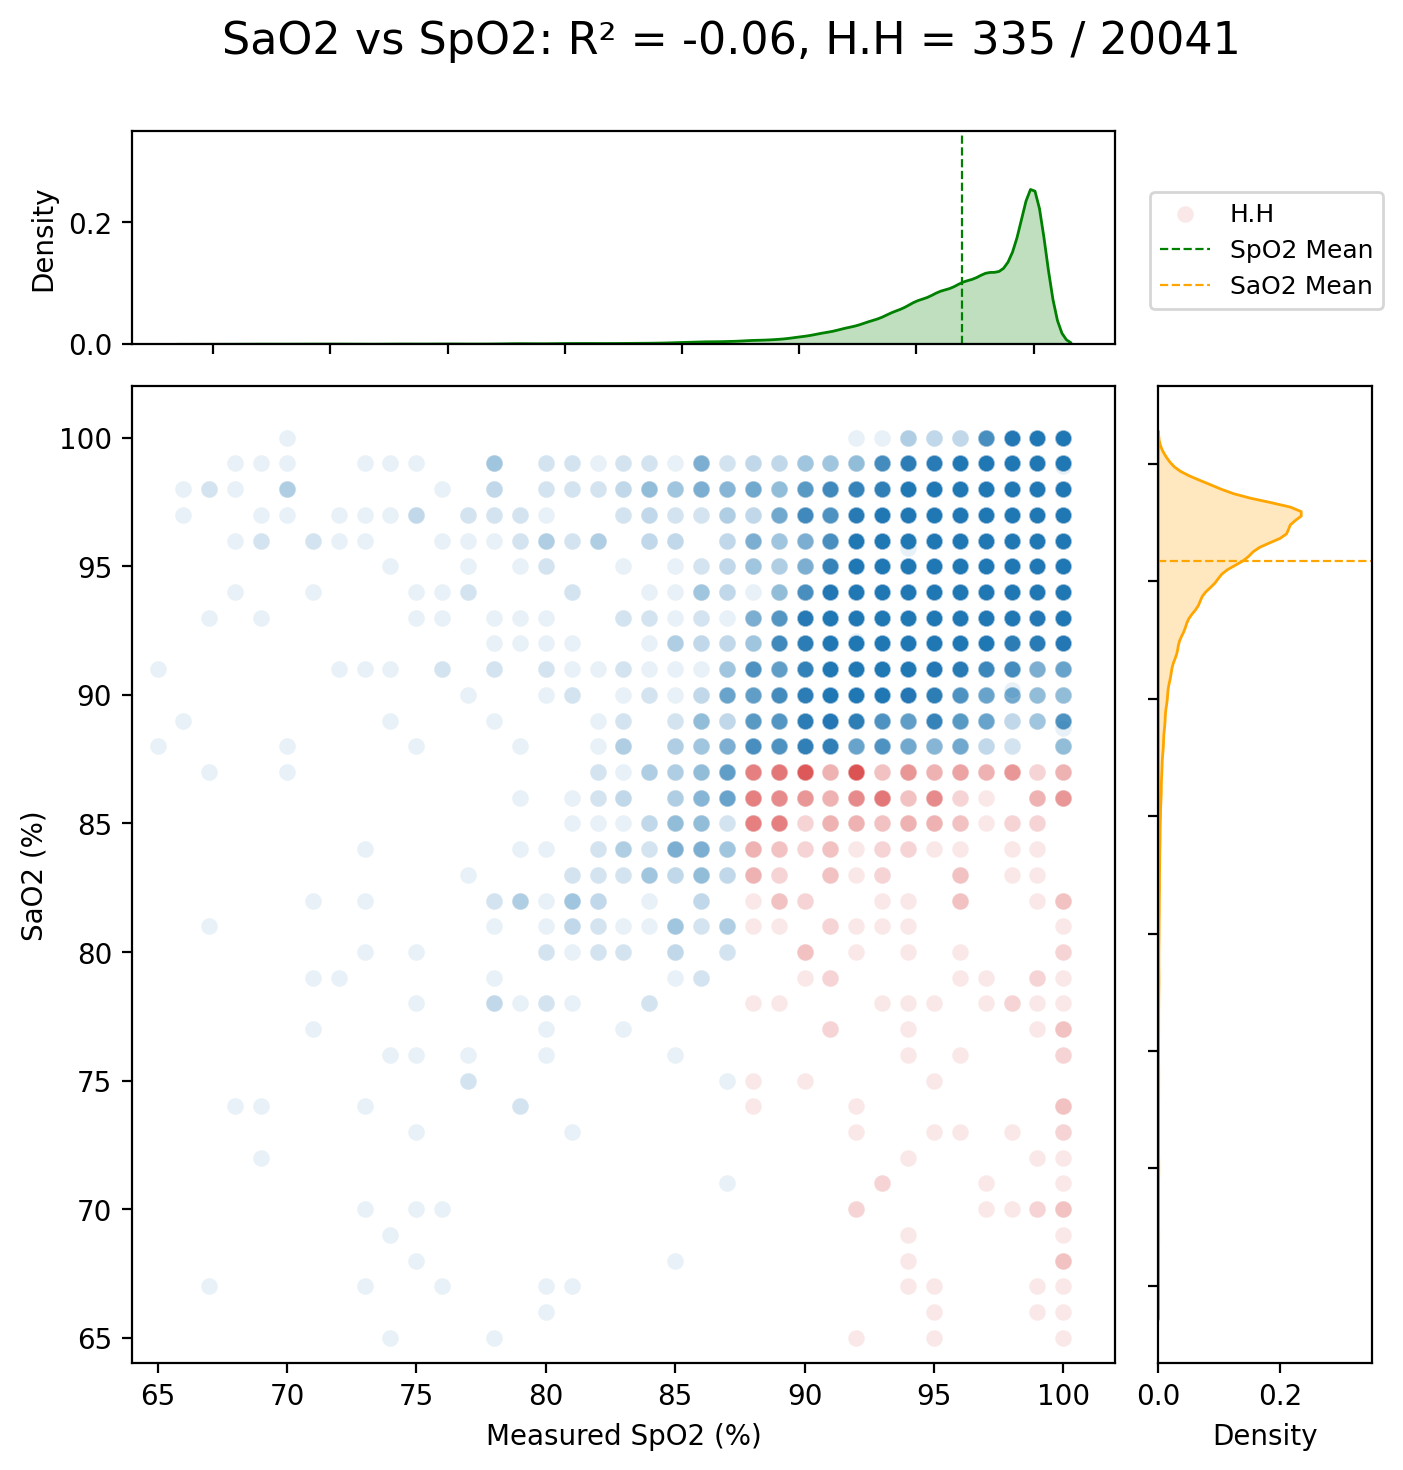

In [87]:
sao2_spo2_plot(data, SaO2_HH=88, SpO2_HH=88, lbl_text="Measured")

#### Measurements Distributions

In [88]:
def sao2_spo2_dists(data, races):
    
    fig, ax = plt.subplots(len(races), 1, sharex= True, sharey=True, figsize=(2 * len(races), 5))

    for i, r in enumerate(races):
        sns.kdeplot(x=data[data.race_group == r].SaO2, ax=ax[i], color='orange', fill=True, label="SaO2")
        sns.kdeplot(x=data[data.race_group == r].SpO2, ax=ax[i], color='green', fill=True, label="SpO2")
        ax[i].set_xlim([90,100])
        ax[i].legend(loc='upper left', ncol=1, fontsize=9)
        ax[i].set_xlabel('O2 Saturation (%)')
        ax[i].set_title(f'{r} Patients')

    fig.suptitle('SaO2 and SpO2 Density Distributions')
    plt.show()

In [89]:
# Encode Race Groups
data.race_group = data.race_group.apply(lambda x: 'Non-White' if x != 'White' \
                                                              else 'White')

races = data.race_group.unique()  #["White", "Non-White"]

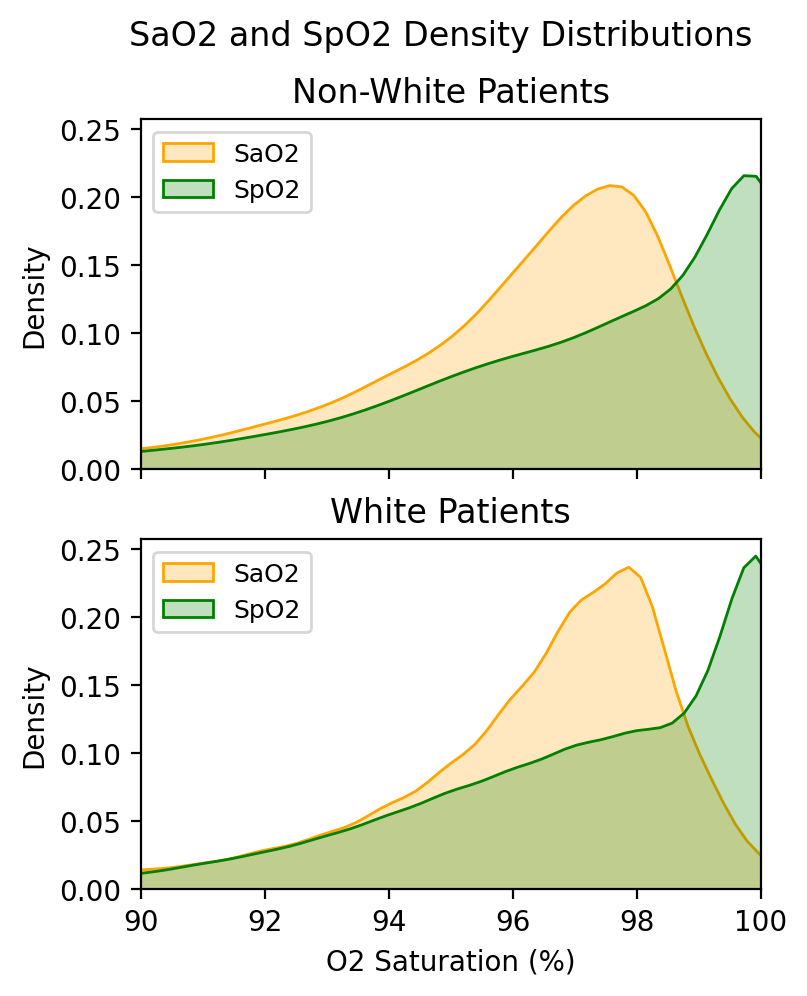

In [90]:
sao2_spo2_dists(data, races)

#### Gap Distributions

In [91]:
def sao2_spo2_gap(data, races, comparison="White vs. Non-White"):

    fig, ax = plt.subplots(1, 1, sharex= True, sharey=True, figsize=(8,4))

    colors = ['green', 'black']

    for i, r in enumerate(races):
        sns.kdeplot(x=data[data.race_group == r].SpO2 - data[data.race_group == r].SaO2,
              ax=ax, color=colors[i], fill=True, label=r)

    ax.set_xlim([-4,4])
    ax.legend(loc='upper left', ncol=1, fontsize=9)
    ax.set_xlabel('SpO2 - SaO2 (%)')
    ax.set_title(f'SpO2 - SaO2 Gap Distribution, {comparison} Patients')

    plt.show()

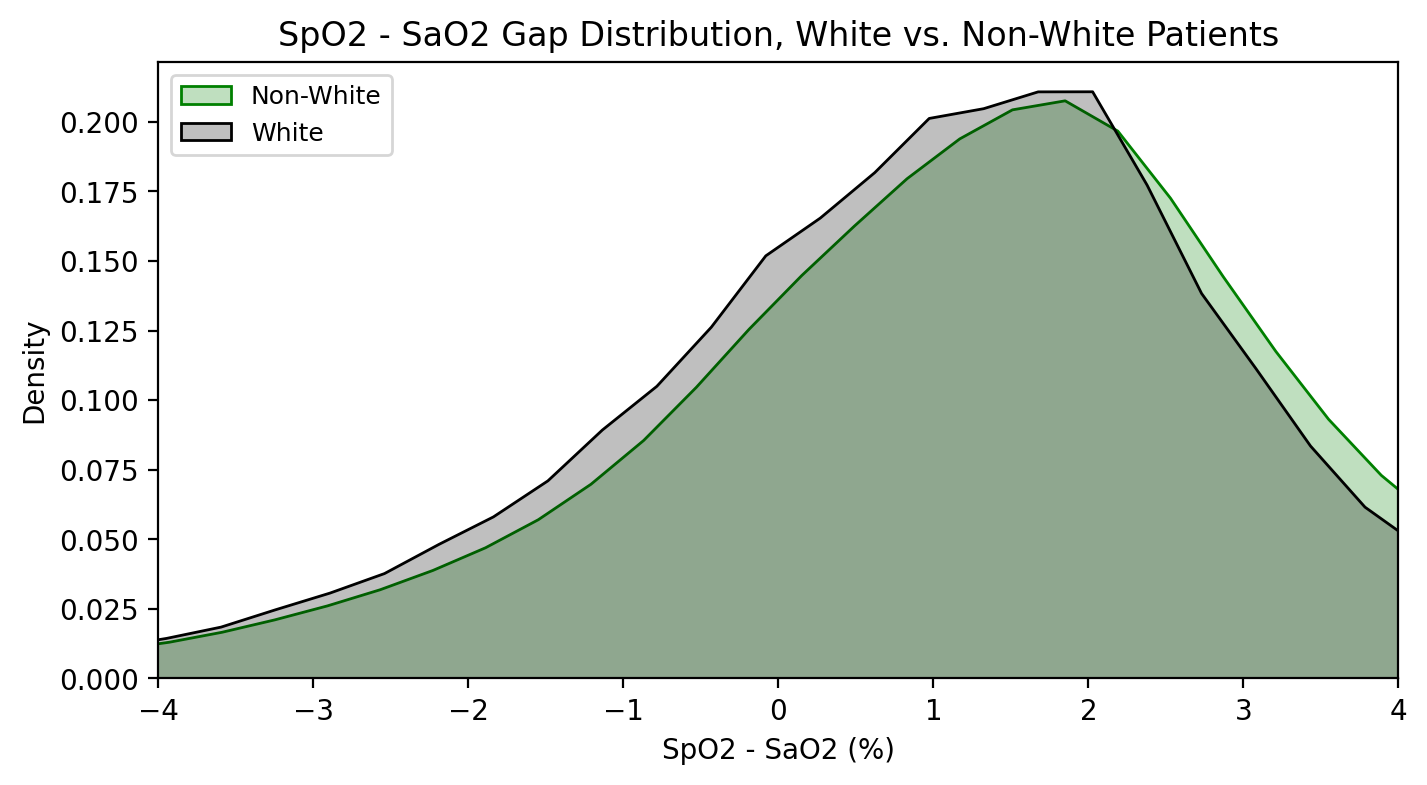

In [92]:
sao2_spo2_gap(data, races, comparison="White vs. Non-White")